In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_eval(csv_path, title="SAC Training Performance", smooth=None):
    df = pd.read_csv(csv_path)

    steps = df["step"].values
    avg = df["avg_return"].values
    std = df["std_return"].values

    if smooth and smooth > 1:
        avg = pd.Series(avg).rolling(smooth, min_periods=1).mean().values
        std = pd.Series(std).rolling(smooth, min_periods=1).mean().values

    plt.figure(figsize=(8, 5))
    plt.plot(steps, avg, label="Average Return", color="blue")
    plt.fill_between(steps, avg - std, avg + std, color="blue", alpha=0.2, label="Std Dev")
    plt.title(title)
    plt.xlabel("Steps")
    plt.ylabel("Average Return")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

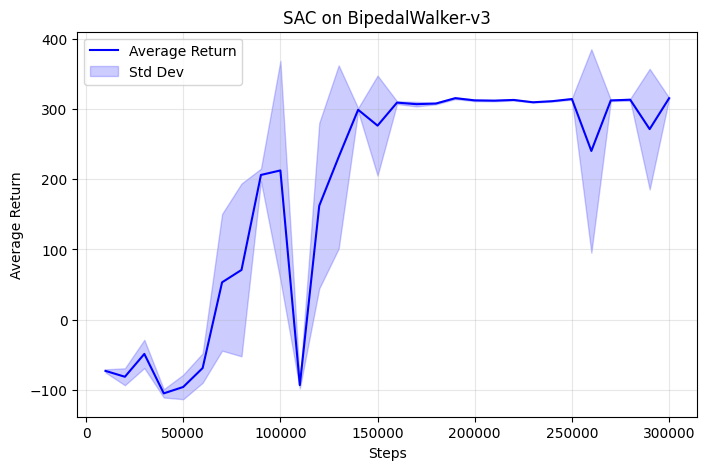

In [3]:
# For easy env (300k run)
plot_eval("results/BipedalWalker-v3/eval_log.csv", title="SAC on BipedalWalker-v3", smooth=1)


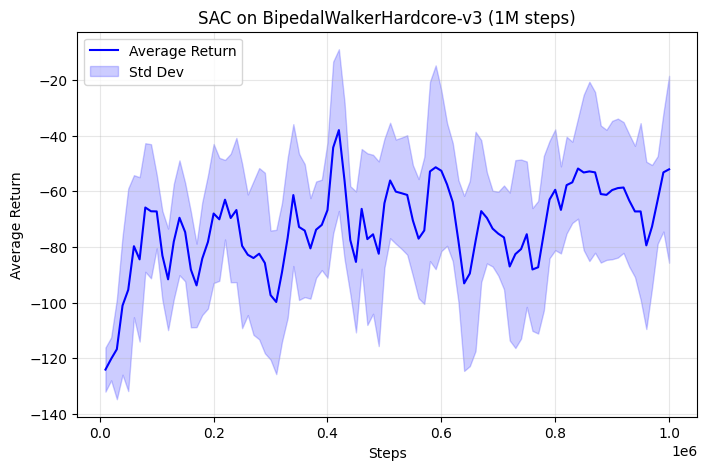

In [5]:
# For hardcore (1M run)
plot_eval("results/BipedalWalkerHardcore-v3_1mill_steps/eval_log.csv", title="SAC on BipedalWalkerHardcore-v3 (1M steps)", smooth=3)

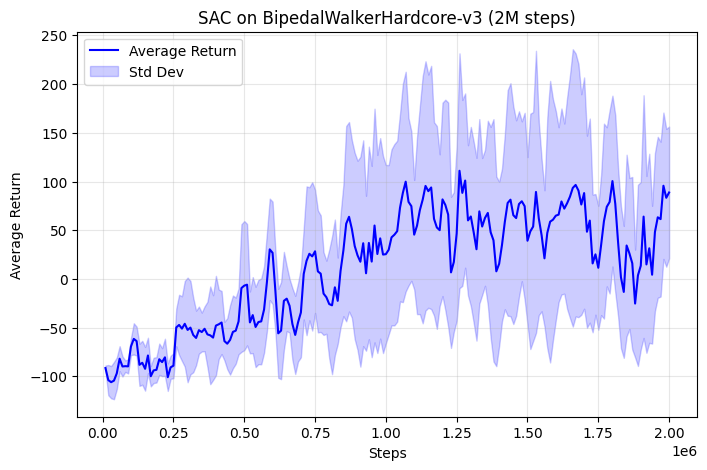

In [7]:
# For hardcore (2M run)
plot_eval("results/BipedalWalkerHardcore-v3/eval_log.csv", title="SAC on BipedalWalkerHardcore-v3 (2M steps)", smooth=3)